<a href="https://colab.research.google.com/github/MathiasJannikBrussow/DSP/blob/main/segment_ml_el.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/new_car_data_el123.csv')

In [ ]:
columns_to_replace = ['GPS','Range (Electric)','Trailer Hitch', '4WD', 'Parkingsensor', 'Cruise Control', 'Antispin', 'ESP', 'El-SÃ¦der', 'Leather Interior', 'Glass Roof', 'Headup Display', 'Isofix', 'KlimaanlÃ¦g', 'Regnsensor', 'Soltag', 'Sports Package', 'Seatwarmer', 'Xenon Lights', 'Non-Smoker', 'One-Owner', 'Service OK', 'Nysynet', 'Demo Car', 'Partly Leather Interior', 'CVR/Engros', 'Full Leather', 'Adaptive Cruise Control']  # Specify the columns you want to replace values in
data[columns_to_replace] = data[columns_to_replace].replace({'Yes': 1, 'No': 0})

In [ ]:
# Make vector of features for modelling
selected_features = data.columns.tolist()
# Remove the columns from our vector that are not meant to be used for modelling
selected_features.remove('Price')
selected_features.remove('Link')
selected_features.remove('Segment')


In [ ]:
p_data = data[data['Segment'] == 'Premium']


# Perform the train-test split on the luxury segment
pX_train, pX_test, py_train, py_test = train_test_split(
    p_data[selected_features],
    p_data['Price'],
    test_size=0.2,  # 20% of the data will be used for testing
    random_state=42  # Ensures reproducibility of the split
)

In [ ]:
data.tail(500)

,KM Driven,Km/L,Range (Electric),Price,GPS,Trailer Hitch,4WD,Parkingsensor,Cruise Control,Antispin,...,Model_i4,Model_i40,Model_iON,Model_iQ,Model_iX,Model_iX1,Model_iX3,Model_ix20,Model_ix35,Model_up!
2244,40000,16.0,490.0,299800,1,0,0,1,0,1,...,False,False,False,False,False,False,False,False,False,False
2245,25000,16.0,424.0,229800,1,0,0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2246,29000,16.0,343.0,249800,1,0,0,1,0,1,...,False,False,False,False,False,False,False,False,False,False
2247,22000,15.0,232.0,159800,1,0,0,1,0,1,...,False,False,False,False,False,False,False,False,False,False
2248,37000,15.0,232.0,154800,1,0,0,1,0,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,13000,17.0,572.0,419900,1,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2740,10000,18.0,535.0,484900,1,0,1,1,0,1,...,False,False,False,False,False,False,False,False,False,False
2741,3000,18.0,506.0,429800,1,0,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2742,3000,16.0,581.0,429900,1,0,0,1,1,1,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(pX_train)
X_test_scaled = scaler.transform(pX_test)

# Create and train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_scaled, py_train)

# Make predictions
predictions = knn.predict(X_test_scaled)

# Evaluate the model
r_squared = r2_score(py_test, predictions)
mae = mean_absolute_error(py_test, predictions)
rmse = np.sqrt(mean_squared_error(py_test, predictions))

# Print the performance metrics
print(f"R² Score: {r_squared}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

R² Score: 0.8057571894001417
Mean Absolute Error: 27519.859493670883
Root Mean Squared Error: 38630.29292041694


In [ ]:
# Baseline xgboosting without parameters # 6 sec
xgb_model = XGBRegressor(n_estimators=600)
xgb_model.fit(pX_train, py_train)
predictions_xgb = xgb_model.predict(pX_test)

#Metrics
r_squared = r2_score(py_test, predictions_xgb)
mae = mean_absolute_error(py_test, predictions_xgb)
mse = mean_squared_error(py_test, predictions_xgb)
rmse = np.sqrt(mse)
#Print Metrics
print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Feature Importance
feature_importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': pX_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
N = 25  # Number of Features
print("Top", N, "important features:")
print(feature_importance_df.head(N))

R-squared: 0.865627449219989
Mean Absolute Error: 21711.40466772152
Mean Squared Error: 1032337278.8149971
Root Mean Squared Error: 32130.005895035207
Top 25 important features:
                     Feature  Importance
35                 Brand_BMW    0.276707
48            Brand_Mercedes    0.231574
443            Model_Model 3    0.108230
32                Horsepower    0.040713
491                 Model_Q8    0.039350
382                Model_ID.    0.036631
34                Brand_Audi    0.032871
44              Brand_Jaguar    0.032715
311             Model_EQA350    0.027458
317             Model_EQE350    0.011241
315             Model_EQB350    0.011084
46                  Brand_MG    0.010187
54            Brand_Polestar    0.010110
59               Brand_Tesla    0.009746
13            Headup Display    0.008080
6              Parkingsensor    0.007495
19            Sports Package    0.006552
27   Partly Leather Interior    0.006202
62               Brand_Volvo    0.005961
57

In [ ]:
# XGBoosting with hyperparameters # 32 min

# Defining grid
param_grid = {
        'min_child_weight': [5, 10],
        'gamma': [0, 2],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 1.0],
        'max_depth': [3, 8, 12]
        }

xgb_model = XGBRegressor(n_estimators=600)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=0)
grid_search.fit(pX_train, py_train)
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(pX_test)

#Metrics
r_squared = r2_score(py_test, predictions)
mae = mean_absolute_error(py_test, predictions)
mse = mean_squared_error(py_test, predictions)
rmse = np.sqrt(mse)
#Print Metrics
print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Feature Importance
feature_importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': pX_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
N = 25  # Number of Features
print("Top", N, "important features:")
print(feature_importance_df.head(N))

Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'max_depth': 8, 'min_child_weight': 10, 'subsample': 1.0}
R-squared: 0.8611779330398579
Mean Absolute Error: 26771.68505618751
Mean Squared Error: 1791975842.1722767
Root Mean Squared Error: 42331.73563855227
Top 25 important features:
                     Feature  Importance
60          Gear_Automatgear    0.271548
61         Gear_Manuelt gear    0.083528
52             Brand_Porsche    0.024937
30                Horsepower    0.023986
44                  Brand_MG    0.017475
46            Brand_Mercedes    0.017227
28   Adaptive Cruise Control    0.015451
0                  KM Driven    0.014002
64          Fuel_Type_Hybrid    0.013301
4                        4WD    0.013149
17            Sports Package    0.013066
634                 Model_i3    0.012773
609               Model_XC60    0.011924
180                 Model_A6    0.011682
50                Brand_Opel    0.011072
198             Model_Arteon    0.010682
19          

Random Forest Regression Model Evaluation:
R-squared: 0.8745967321206031
Mean Absolute Error: 20312.448656821376
Mean Squared Error: 963429417.4341353
Root Mean Squared Error: 31039.159418936193
Top 25 important features:
                     Feature  Importance
32                Horsepower    0.227511
48            Brand_Mercedes    0.126352
35                 Brand_BMW    0.115243
0                  KM Driven    0.073438
317             Model_EQE350    0.045294
2           Range (Electric)    0.037862
316             Model_EQC400    0.037342
34                Brand_Audi    0.028211
31                      Year    0.023160
6              Parkingsensor    0.019825
382                Model_ID.    0.018850
491                 Model_Q8    0.016673
443            Model_Model 3    0.015419
13            Headup Display    0.013793
488                 Model_Q4    0.012375
19            Sports Package    0.011413
1                       Km/L    0.011105
27   Partly Leather Interior    0.009586

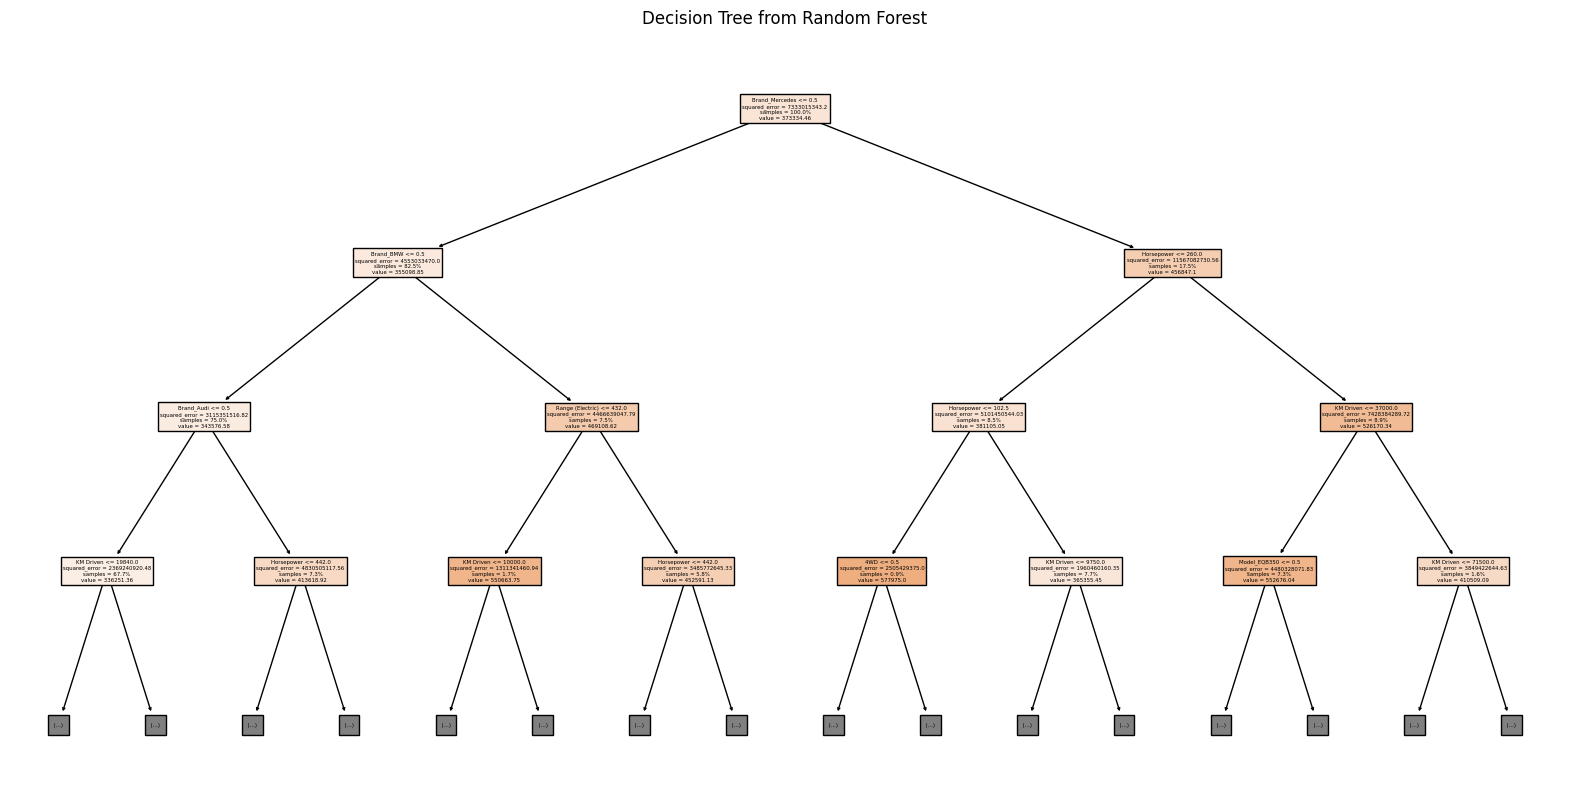

In [ ]:
# Random Forest # 2 min
rf_model = RandomForestRegressor(n_estimators=600, random_state=42)

# Train the model
rf_model.fit(pX_train, py_train)

# Make predictions on the test set
rpredictions = rf_model.predict(pX_test)

# Calculate Mean Squared Error
rr_squared = r2_score(py_test, rpredictions)
rmae = mean_absolute_error(py_test, rpredictions)
rmse = mean_squared_error(py_test, rpredictions)
rrmse = np.sqrt(rmse)

print("Random Forest Regression Model Evaluation:")
print("R-squared:", rr_squared)
print("Mean Absolute Error:", rmae)
print("Mean Squared Error:", rmse)
print("Root Mean Squared Error:", rrmse)

# Feature Importance For Random Forest
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': pX_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
N = 25  # Number of Features
print("Top", N, "important features:")
print(feature_importance_df.head(N))


# Assuming rf_model is your trained RandomForestRegressor
# Extract one tree from the forest
tree = rf_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))  # Set the figure size (width, height) in inches
plot_tree(tree, filled=True, feature_names=pX_train.columns, max_depth=3, precision=2, proportion=True)
plt.title('Decision Tree from Random Forest')
plt.show()


In [ ]:
# Linear regressionsmodel # 1 sec
l_features = ['KM Driven', 'Year', 'Horsepower', 'Km/L', 'Brand_Mercedes', 'Range (Electric)']
lX_train, lX_test, ly_train, ly_test = train_test_split(p_data[l_features], p_data['Price'], test_size=0.2, random_state=42)

linear_model = LinearRegression()

# Train the model
linear_model.fit(lX_train, ly_train)

# Make predictions on the test set
linear_predictions = linear_model.predict(lX_test)

# Metrics
linear_r_squared = r2_score(ly_test, linear_predictions)
linear_mae = mean_absolute_error(ly_test, linear_predictions)
linear_mse = mean_squared_error(ly_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)

print("Linear Regression Model Evaluation:")
print("R-squared:", linear_r_squared)
print("Mean Absolute Error:", linear_mae)
print("Mean Squared Error:", linear_mse)
print("Root Mean Squared Error:", linear_rmse)

Linear Regression Model Evaluation:
R-squared: 0.39982474625076436
Mean Absolute Error: 53820.082468151704
Mean Squared Error: 4610936420.206399
Root Mean Squared Error: 67903.87632680773


In [ ]:
m_data = data[data['Segment'] == 'Mid-Range']


# Perform the train-test split on the luxury segment
mX_train, mX_test, my_train, my_test = train_test_split(
    m_data[selected_features],
    m_data['Price'],
    test_size=0.2,  # 20% of the data will be used for testing
    random_state=42  # Ensures reproducibility of the split
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(mX_train)
X_test_scaled = scaler.transform(mX_test)

# Create and train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_scaled, my_train)

# Make predictions
predictions = knn.predict(X_test_scaled)

# Evaluate the model
r_squared = r2_score(my_test, predictions)
mae = mean_absolute_error(my_test, predictions)
rmse = np.sqrt(mean_squared_error(my_test, predictions))

# Print the performance metrics
print(f"R² Score: {r_squared}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

R² Score: 0.6526952438411502
Mean Absolute Error: 15160.524999999998
Root Mean Squared Error: 20594.028134351916


In [ ]:
# Baseline xgboosting without parameters # 6 sec
xgb_model = XGBRegressor(n_estimators=600)
xgb_model.fit(mX_train, my_train)
predictions_xgb = xgb_model.predict(mX_test)

#Metrics
r_squared = r2_score(my_test, predictions_xgb)
mae = mean_absolute_error(my_test, predictions_xgb)
mse = mean_squared_error(my_test, predictions_xgb)
rmse = np.sqrt(mse)
#Print Metrics
print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Feature Importance
feature_importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': mX_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
N = 25  # Number of Features
print("Top", N, "important features:")
print(feature_importance_df.head(N))

R-squared: 0.7869417126843895
Mean Absolute Error: 11614.961531929348
Mean Squared Error: 260177840.22806847
Root Mean Squared Error: 16130.029145295071
Top 25 important features:
              Feature  Importance
384         Model_ID4    0.213369
32         Horsepower    0.065692
425         Model_MG4    0.065515
638       Model_e-up!    0.054840
60       Brand_Toyota    0.036945
55      Brand_Renault    0.036448
34         Brand_Audi    0.036080
629        Model_e-C4    0.034019
31               Year    0.032692
622          Model_ZS    0.031723
43      Brand_Hyundai    0.030102
51       Brand_Nissan    0.026457
322       Model_Enyaq    0.023241
443     Model_Model 3    0.020433
47        Brand_Mazda    0.015106
57        Brand_Skoda    0.014155
37     Brand_CitroÃ«n    0.013794
631      Model_e-Golf    0.013527
383         Model_ID3    0.013049
46           Brand_MG    0.012638
624         Model_Zoe    0.012101
12         Glass Roof    0.011623
2    Range (Electric)    0.010005
1   

In [ ]:
# XGBoosting with hyperparameters # 32 min

# Defining grid
param_grid = {
        'min_child_weight': [5, 10],
        'gamma': [0, 2],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 1.0],
        'max_depth': [3, 8, 12]
        }

xgb_model = XGBRegressor(n_estimators=600)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=0)
grid_search.fit(mX_train, my_train)
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(mX_test)

#Metrics
r_squared = r2_score(my_test, predictions)
mae = mean_absolute_error(my_test, predictions)
mse = mean_squared_error(my_test, predictions)
rmse = np.sqrt(mse)
#Print Metrics
print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Feature Importance
feature_importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': mX_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
N = 25  # Number of Features
print("Top", N, "important features:")
print(feature_importance_df.head(N))

Random Forest Regression Model Evaluation:
R-squared: 0.7740882796316539
Mean Absolute Error: 11919.781243961355
Mean Squared Error: 275873913.32295346
Root Mean Squared Error: 16609.452529296486
Top 25 important features:
                     Feature  Importance
32                Horsepower    0.207360
0                  KM Driven    0.173792
2           Range (Electric)    0.142786
31                      Year    0.140657
384                Model_ID4    0.047978
1                       Km/L    0.039226
383                Model_ID3    0.015353
12                Glass Roof    0.014560
26                  Demo Car    0.013111
13            Headup Display    0.009899
17                Regnsensor    0.008388
61                  Brand_VW    0.007899
43             Brand_Hyundai    0.007198
24                Service OK    0.006395
11          Leather Interior    0.005728
21              Xenon Lights    0.005429
404               Model_Kona    0.005376
7             Cruise Control    0.00523

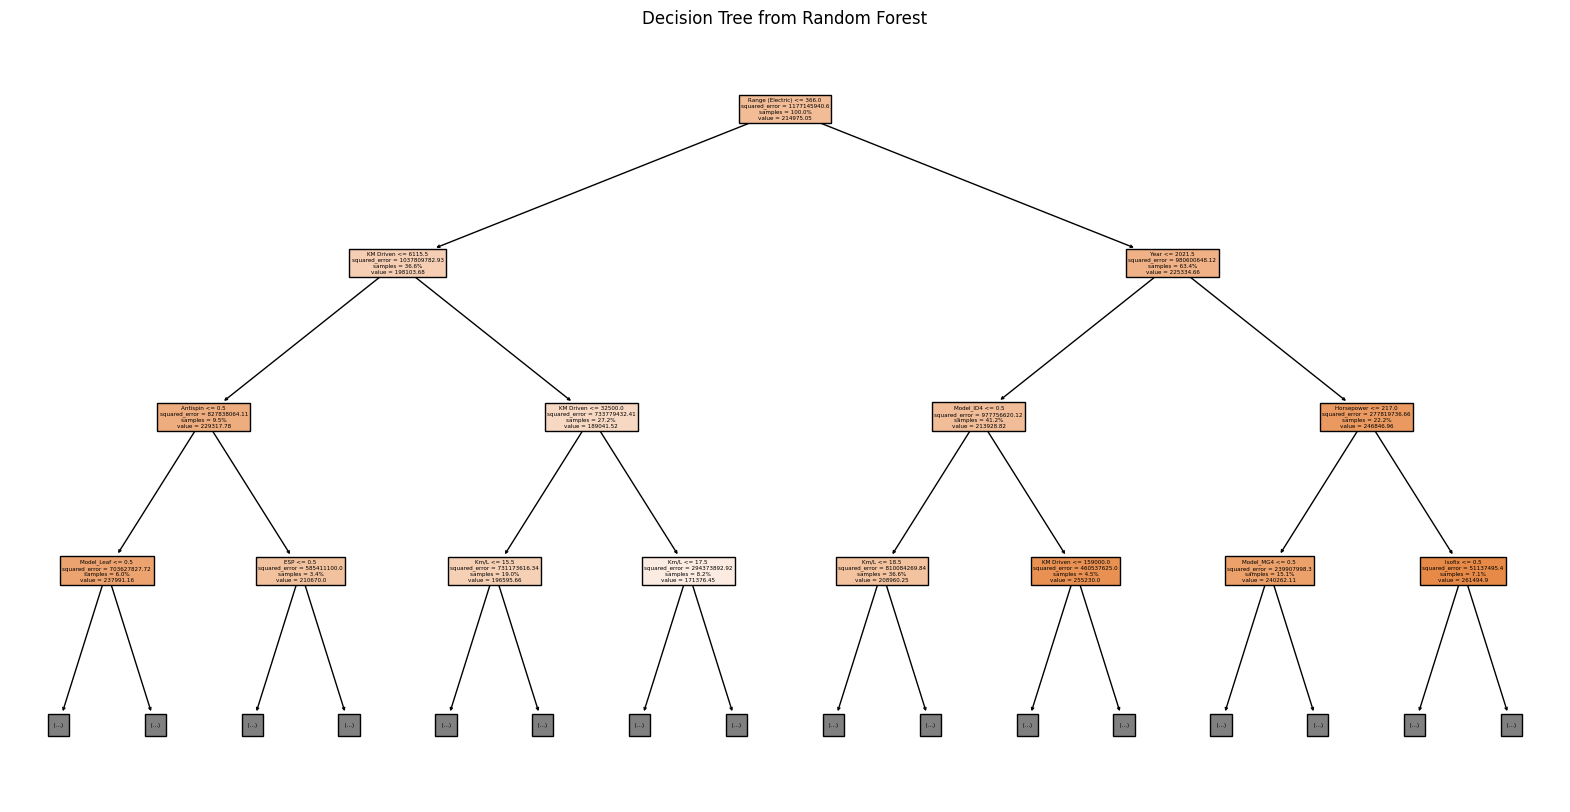

In [ ]:
# Random Forest # 2 min
rf_model = RandomForestRegressor(n_estimators=600, random_state=42)

# Train the model
rf_model.fit(mX_train, my_train)

# Make predictions on the test set
rpredictions = rf_model.predict(mX_test)

# Calculate Mean Squared Error
rr_squared = r2_score(my_test, rpredictions)
rmae = mean_absolute_error(my_test, rpredictions)
rmse = mean_squared_error(my_test, rpredictions)
rrmse = np.sqrt(rmse)

print("Random Forest Regression Model Evaluation:")
print("R-squared:", rr_squared)
print("Mean Absolute Error:", rmae)
print("Mean Squared Error:", rmse)
print("Root Mean Squared Error:", rrmse)

# Feature Importance For Random Forest
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': mX_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
N = 25  # Number of Features
print("Top", N, "important features:")
print(feature_importance_df.head(N))


# Assuming rf_model is your trained RandomForestRegressor
# Extract one tree from the forest
tree = rf_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))  # Set the figure size (width, height) in inches
plot_tree(tree, filled=True, feature_names=mX_train.columns, max_depth=3, precision=2, proportion=True)
plt.title('Decision Tree from Random Forest')
plt.show()

In [ ]:
# Linear regressionsmodel # 1 sec
l_features = ['KM Driven', 'Year', 'Horsepower', 'Km/L', 'Gear_Automatgear', 'Range (Electric)', 'Adaptive Cruise Control']
lX_train, lX_test, ly_train, ly_test = train_test_split(m_data[l_features], m_data['Price'], test_size=0.2, random_state=42)

linear_model = LinearRegression()

# Train the model
linear_model.fit(lX_train, ly_train)

# Make predictions on the test set
linear_predictions = linear_model.predict(lX_test)

# Metrics
linear_r_squared = r2_score(ly_test, linear_predictions)
linear_mae = mean_absolute_error(ly_test, linear_predictions)
linear_mse = mean_squared_error(ly_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)

print("Linear Regression Model Evaluation:")
print("R-squared:", linear_r_squared)
print("Mean Absolute Error:", linear_mae)
print("Mean Squared Error:", linear_mse)
print("Root Mean Squared Error:", linear_rmse)

Linear Regression Model Evaluation:
R-squared: 0.4077074857764863
Mean Absolute Error: 20586.16516581836
Mean Squared Error: 723282764.8973387
Root Mean Squared Error: 26893.91687533333


In [ ]:
e_data = data[data['Segment'] == 'Economy']


# Perform the train-test split on the luxury segment
eX_train, eX_test, ey_train, ey_test = train_test_split(
    e_data[selected_features],
    e_data['Price'],
    test_size=0.2,  # 20% of the data will be used for testing
    random_state=42  # Ensures reproducibility of the split
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(eX_train)
X_test_scaled = scaler.transform(eX_test)

# Create and train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_scaled, ey_train)

# Make predictions
predictions = knn.predict(X_test_scaled)

# Evaluate the model
r_squared = r2_score(ey_test, predictions)
mae = mean_absolute_error(ey_test, predictions)
rmse = np.sqrt(mean_squared_error(ey_test, predictions))

# Print the performance metrics
print(f"R² Score: {r_squared}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

R² Score: 0.05770854763148303
Mean Absolute Error: 11825.196000000002
Root Mean Squared Error: 16468.358464959405


In [ ]:
# Baseline xgboosting without parameters # 6 sec
xgb_model = XGBRegressor(n_estimators=600)
xgb_model.fit(eX_train, ey_train)
predictions_xgb = xgb_model.predict(eX_test)

#Metrics
r_squared = r2_score(ey_test, predictions_xgb)
mae = mean_absolute_error(ey_test, predictions_xgb)
mse = mean_squared_error(ey_test, predictions_xgb)
rmse = np.sqrt(mse)
#Print Metrics
print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Feature Importance
feature_importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': eX_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
N = 25  # Number of Features
print("Top", N, "important features:")
print(feature_importance_df.head(N))

R-squared: 0.3783372272998211
Mean Absolute Error: 8763.65140625
Mean Squared Error: 178924673.2727649
Root Mean Squared Error: 13376.272772067894
Top 25 important features:
              Feature  Importance
32         Horsepower    0.489023
31               Year    0.158000
55      Brand_Renault    0.087577
575      Model_Twingo    0.064524
51       Brand_Nissan    0.037960
29       Full Leather    0.023315
631      Model_e-Golf    0.018329
26           Demo Car    0.014701
624         Model_Zoe    0.009231
2    Range (Electric)    0.007655
633     Model_e-NV200    0.007181
1                Km/L    0.006438
6       Parkingsensor    0.006235
3                 GPS    0.006165
13     Headup Display    0.005834
411        Model_Leaf    0.005765
7      Cruise Control    0.004942
17         Regnsensor    0.004655
47        Brand_Mazda    0.004634
25            Nysynet    0.003947
11   Leather Interior    0.003804
14             Isofix    0.002912
0           KM Driven    0.002911
61        

In [ ]:
# XGBoosting with hyperparameters # 32 min

# Defining grid
param_grid = {
        'min_child_weight': [5, 10],
        'gamma': [0, 2],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 1.0],
        'max_depth': [3, 8, 12]
        }

xgb_model = XGBRegressor(n_estimators=600)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=0)
grid_search.fit(eX_train, ey_train)
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(eX_test)

#Metrics
r_squared = r2_score(ey_test, predictions)
mae = mean_absolute_error(ey_test, predictions)
mse = mean_squared_error(ey_test, predictions)
rmse = np.sqrt(mse)
#Print Metrics
print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Feature Importance
feature_importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': eX_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
N = 25  # Number of Features
print("Top", N, "important features:")
print(feature_importance_df.head(N))

Random Forest Regression Model Evaluation:
R-squared: 0.24531493176065378
Mean Absolute Error: 9574.645933333333
Mean Squared Error: 217210656.9483832
Root Mean Squared Error: 14738.068290939054
Top 25 important features:
              Feature  Importance
32         Horsepower    0.466480
31               Year    0.205369
2    Range (Electric)    0.126470
0           KM Driven    0.071996
317      Model_EQE350    0.017723
1                Km/L    0.013273
26           Demo Car    0.010405
48     Brand_Mercedes    0.004341
6       Parkingsensor    0.004241
3                 GPS    0.003885
631      Model_e-Golf    0.003723
575      Model_Twingo    0.003712
55      Brand_Renault    0.003701
442         Model_Mii    0.003647
10          El-SÃ¦der    0.003406
23          One-Owner    0.003338
51       Brand_Nissan    0.003070
15        KlimaanlÃ¦g    0.002997
56         Brand_Seat    0.002979
25            Nysynet    0.002854
17         Regnsensor    0.002839
7      Cruise Control    0.002

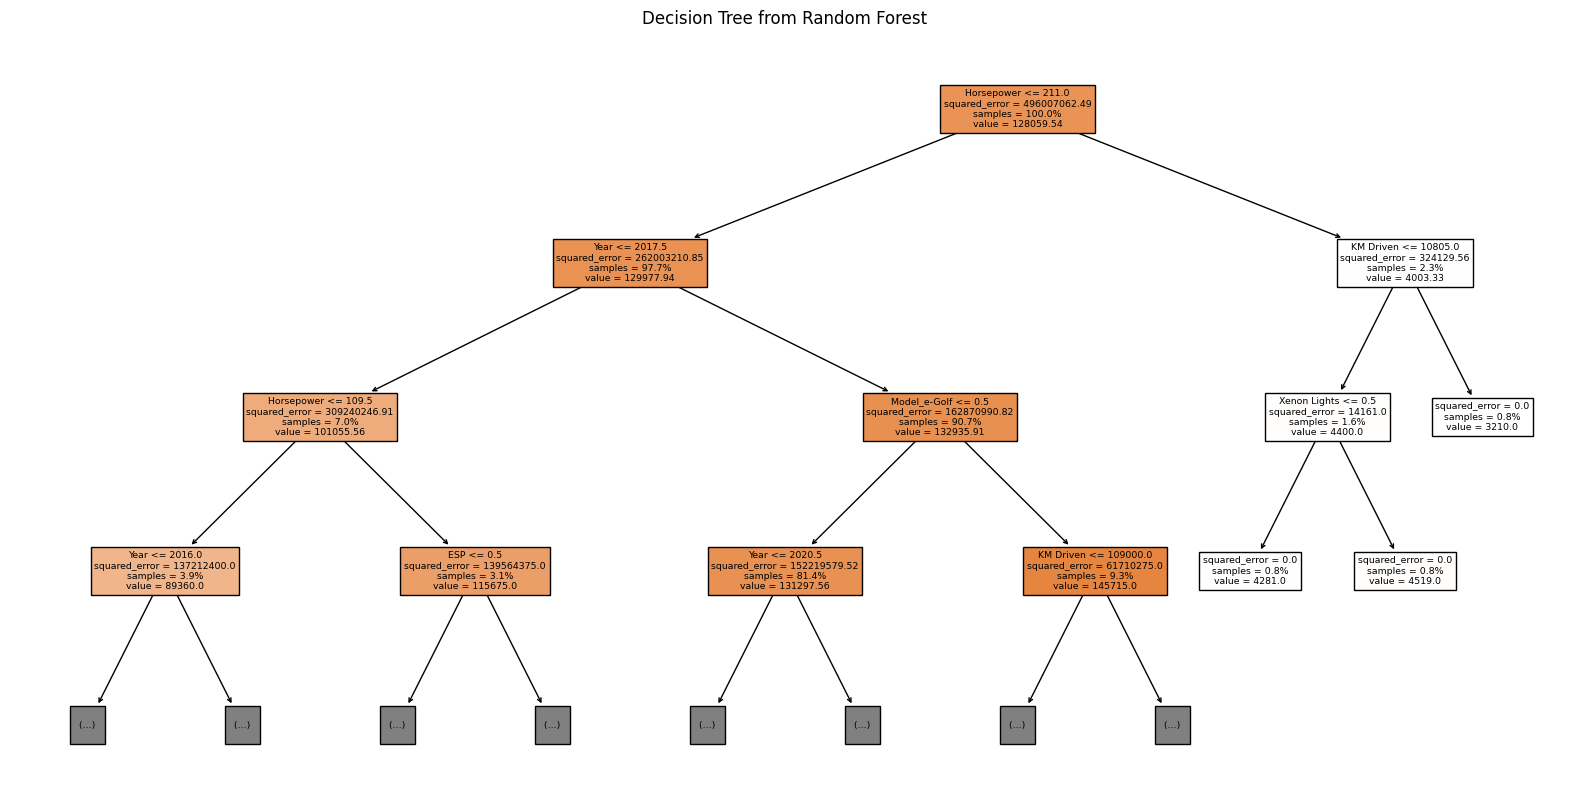

In [ ]:
# Random Forest # 2 min
rf_model = RandomForestRegressor(n_estimators=600, random_state=42)

# Train the model
rf_model.fit(eX_train, ey_train)

# Make predictions on the test set
rpredictions = rf_model.predict(eX_test)

# Calculate Mean Squared Error
rr_squared = r2_score(ey_test, rpredictions)
rmae = mean_absolute_error(ey_test, rpredictions)
rmse = mean_squared_error(ey_test, rpredictions)
rrmse = np.sqrt(rmse)

print("Random Forest Regression Model Evaluation:")
print("R-squared:", rr_squared)
print("Mean Absolute Error:", rmae)
print("Mean Squared Error:", rmse)
print("Root Mean Squared Error:", rrmse)

# Feature Importance For Random Forest
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': eX_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
N = 25  # Number of Features
print("Top", N, "important features:")
print(feature_importance_df.head(N))


# Assuming rf_model is your trained RandomForestRegressor
# Extract one tree from the forest
tree = rf_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))  # Set the figure size (width, height) in inches
plot_tree(tree, filled=True, feature_names=eX_train.columns, max_depth=3, precision=2, proportion=True)
plt.title('Decision Tree from Random Forest')
plt.show()


In [ ]:
# Linear regressionsmodel # 1 sec
l_features = ['KM Driven', 'Year', 'Horsepower', 'Km/L', 'Gear_Automatgear', 'Range (Electric)', 'Adaptive Cruise Control']
lX_train, lX_test, ly_train, ly_test = train_test_split(e_data[l_features], e_data['Price'], test_size=0.2, random_state=42)

linear_model = LinearRegression()

# Train the model
linear_model.fit(lX_train, ly_train)

# Make predictions on the test set
linear_predictions = linear_model.predict(lX_test)

# Metrics
linear_r_squared = r2_score(ly_test, linear_predictions)
linear_mae = mean_absolute_error(ly_test, linear_predictions)
linear_mse = mean_squared_error(ly_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)

print("Linear Regression Model Evaluation:")
print("R-squared:", linear_r_squared)
print("Mean Absolute Error:", linear_mae)
print("Mean Squared Error:", linear_mse)
print("Root Mean Squared Error:", linear_rmse)

Linear Regression Model Evaluation:
R-squared: -0.3465299515117992
Mean Absolute Error: 15962.092449611127
Mean Squared Error: 387553255.8910959
Root Mean Squared Error: 19686.372339542293
